In [65]:
import pandas as pd
import sklearn
import csv
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV

In [59]:
df = pd.read_csv("./data/value.csv", sep = ";")
df

,Latence1,Latence2,Latence3,CPU1,RAM1,CPU2,RAM2,CPU3,RAM3,Coord1,Coord2
0,0.168295,0.250647,0.175589,0.36,0.7,0.30,0.7,0.80,0.7,3,1
1,0.110052,0.242842,0.097456,0.69,0.4,0.50,0.5,0.17,0.7,1,5
2,0.468962,0.242266,0.137896,0.93,0.6,0.73,0.7,0.83,0.7,2,1
3,0.380637,0.169424,0.122439,0.30,0.7,0.59,0.4,0.62,0.4,0,0
4,0.173749,0.189239,0.230444,0.44,0.7,0.68,0.3,0.33,0.4,0,3
...,...,...,...,...,...,...,...,...,...,...,...
19995,0.353395,0.207639,0.241753,0.59,0.4,0.26,0.3,0.23,0.4,0,3
19996,0.366271,0.110511,0.322599,0.36,0.3,0.28,0.4,0.28,0.7,3,1
19997,0.308927,0.118603,0.338697,0.80,0.3,0.46,0.3,0.46,0.3,0,5
19998,0.294975,0.206861,0.164883,0.71,0.5,0.18,0.7,0.79,0.7,0,2


In [53]:
df.dtypes

Latence1    float64
Latence2    float64
Latence3    float64
CPU1        float64
RAM1        float64
CPU2        float64
RAM2        float64
CPU3        float64
RAM3        float64
Coord1        int64
Coord2        int64
dtype: object

In [54]:
df1= df[["Latence1","CPU1","RAM1"]].copy()
df1 = df1.rename(columns={'Latence1': 'Latence', 'CPU1': 'CPU','RAM1': 'RAM'})
df1['Node']=1
df1

,Latence,CPU,RAM,Node
0,0.168295,0.36,0.7,1
1,0.110052,0.69,0.4,1
2,0.468962,0.93,0.6,1
3,0.380637,0.30,0.7,1
4,0.173749,0.44,0.7,1
...,...,...,...,...
19995,0.353395,0.59,0.4,1
19996,0.366271,0.36,0.3,1
19997,0.308927,0.80,0.3,1
19998,0.294975,0.71,0.5,1


In [55]:
df2= df[["Latence2","CPU2","RAM2"]].copy()
df2 = df2.rename(columns={'Latence2': 'Latence', 'CPU2': 'CPU','RAM2': 'RAM'})
df2['Node']=2
df2

,Latence,CPU,RAM,Node
0,0.250647,0.30,0.7,2
1,0.242842,0.50,0.5,2
2,0.242266,0.73,0.7,2
3,0.169424,0.59,0.4,2
4,0.189239,0.68,0.3,2
...,...,...,...,...
19995,0.207639,0.26,0.3,2
19996,0.110511,0.28,0.4,2
19997,0.118603,0.46,0.3,2
19998,0.206861,0.18,0.7,2


In [56]:
df3= df[["Latence3","CPU3","RAM3"]].copy()
df3 = df3.rename(columns={'Latence3': 'Latence', 'CPU3': 'CPU','RAM3': 'RAM'})
df3['Node']=3
df3

,Latence,CPU,RAM,Node
0,0.175589,0.80,0.7,3
1,0.097456,0.17,0.7,3
2,0.137896,0.83,0.7,3
3,0.122439,0.62,0.4,3
4,0.230444,0.33,0.4,3
...,...,...,...,...
19995,0.241753,0.23,0.4,3
19996,0.322599,0.28,0.7,3
19997,0.338697,0.46,0.3,3
19998,0.164883,0.79,0.7,3


In [57]:
frames = [df1, df2, df3]
df_new = pd.concat(frames)
df_new

,Latence,CPU,RAM,Node
0,0.168295,0.36,0.7,1
1,0.110052,0.69,0.4,1
2,0.468962,0.93,0.6,1
3,0.380637,0.30,0.7,1
4,0.173749,0.44,0.7,1
...,...,...,...,...
19995,0.241753,0.23,0.4,3
19996,0.322599,0.28,0.7,3
19997,0.338697,0.46,0.3,3
19998,0.164883,0.79,0.7,3


In [68]:
# Extraction des échantillons apprentissage et test
y= df["Latence1"].copy()
x= df["Latence1"].copy()
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

,Latence1,Latence2,Latence3,CPU1,RAM1,CPU2,RAM2,CPU3,RAM3,Coord1,Coord2
0,0.168295,0.250647,0.175589,0.36,0.7,0.30,0.7,0.80,0.7,3,1
1,0.110052,0.242842,0.097456,0.69,0.4,0.50,0.5,0.17,0.7,1,5
2,0.468962,0.242266,0.137896,0.93,0.6,0.73,0.7,0.83,0.7,2,1
3,0.380637,0.169424,0.122439,0.30,0.7,0.59,0.4,0.62,0.4,0,0
4,0.173749,0.189239,0.230444,0.44,0.7,0.68,0.3,0.33,0.4,0,3
...,...,...,...,...,...,...,...,...,...,...,...
19995,0.353395,0.207639,0.241753,0.59,0.4,0.26,0.3,0.23,0.4,0,3
19996,0.366271,0.110511,0.322599,0.36,0.3,0.28,0.4,0.28,0.7,3,1
19997,0.308927,0.118603,0.338697,0.80,0.3,0.46,0.3,0.46,0.3,0,5
19998,0.294975,0.206861,0.164883,0.71,0.5,0.18,0.7,0.79,0.7,0,2


In [84]:
df.keys()

Index(['Latence1', 'Latence2', 'Latence3', 'CPU1', 'RAM1', 'CPU2', 'RAM2',
       'CPU3', 'RAM3', 'Coord1', 'Coord2'],
      dtype='object')

ValueError: x and y must have same first dimension, but have shapes (20000,) and (11,)

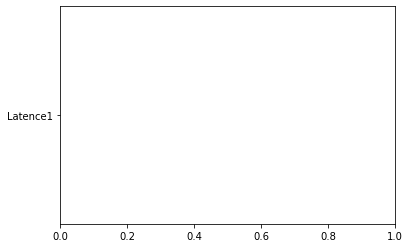

In [83]:
plt.plot(df["Latence1"], df.keys())